# **Lecture 03 - Optimization**: Supplementary Interactive Material

--------------------------------------------------------------

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import ipywidgets as widgets
from ipywidgets import interact

## Visualizing Gradient Descent

Some variation of Gradient descent is the workhorse algorithm behind many of todays optimization heavy tasks, in applications ranging from linear regression to training large language models.

**To understand where gradient descent goes wrong, lets consider a 1D Case:**

In [2]:

# Objective and gradient
def f(x):
    return x**2 + np.sin(10*x)

def grad(x):
    return 2*x + 10*np.cos(10*x)

# Gradient descent (rename lr -> step to avoid name clashes)
def gradient_descent_1d(x0, step=0.05, max_iters=30):
    x = x0
    history = [x]
    for _ in range(max_iters):
        x = x - step * grad(x)
        history.append(x)
    return np.array(history)

# Interactive visualization (names match the sliders!)
def plot_descent(start_1d=-2.0, lr_1d=0.01):
    x_vals = np.linspace(-3, 3, 1000)
    plt.figure(figsize=(10,5))
    plt.plot(x_vals, f(x_vals), 'k-', label=r"$f(x) = x^2 + \sin(10x)$")

    # Run gradient descent using the widget values
    traj = gradient_descent_1d(start_1d, step=lr_1d, max_iters=30)
    plt.plot(traj, f(traj), 'o-', color="red",
             label=f"start={start_1d:.2f}, step={lr_1d:.3f}, iters=30")
    plt.scatter(traj[-1], f(traj[-1]), color="blue", s=80, marker="*", zorder=5, label="final point")

    plt.title("Gradient Descent on a Multi-Well Function")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Sliders
interact(plot_descent,
         start_1d=widgets.FloatSlider(value=-2.0, min=-3, max=3, step=0.1, description="Start"),
         lr_1d=widgets.FloatLogSlider(value=0.01, base=10, min=-3, max=0, step=0.1, description="Step size"))


interactive(children=(FloatSlider(value=-2.0, description='Start', max=3.0, min=-3.0), FloatLogSlider(value=0.…

<function __main__.plot_descent(start_1d=-2.0, lr_1d=0.01)>

## The Rosenbrock Function:

The Rosenbrock function ( *as seen on assignment #1* ) is a notoriously difficult, and classic test function for optimization strategies.

- **What features do you notice about the Rosenbrock function that might make it challenging?**

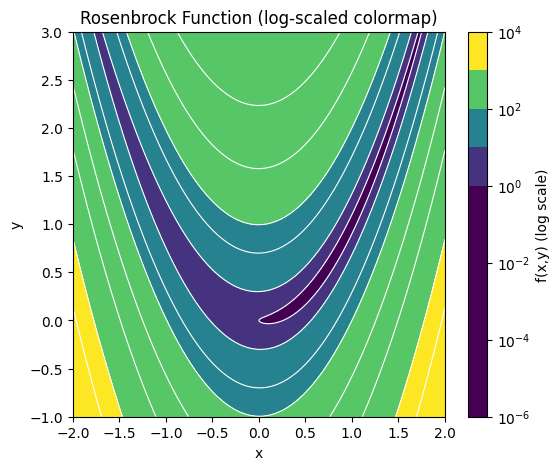

In [3]:
def rosenbrock(x, y):
    return (1 - x)**2 + 100*(y - x**2)**2

X = np.linspace(-2, 2, 400)
Y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(X, Y)
Z = rosenbrock(X, Y)



plt.figure(figsize=(6,5))
cp = plt.contourf(
    X, Y, Z, 
    levels=50, 
    cmap="viridis", 
    norm=mcolors.LogNorm(vmin=1, vmax=Z.max())
)
plt.colorbar(cp, label="f(x,y) (log scale)")
plt.contour(
    X, Y, Z, 
    levels=[1, 10, 50, 100,250, 500, 1000,1500], 
    colors="white", 
    linewidths=0.8
)
plt.title("Rosenbrock Function (log-scaled colormap)")
plt.xlabel("x")
plt.ylabel("y")
plt.show()



## The Rosenbrock Function Con't:

Lets explore the impact of both the starting point, and the learning rate on the ability to optimize the Rosenbrock function.

In [4]:
# Gradient of Rosenbrock
def grad_rosenbrock(x, y):
    dx = -2*(1 - x) - 400*x*(y - x**2)
    dy = 200*(y - x**2)
    return np.array([dx, dy])

# Gradient descent
def gradient_descent(x0, y0, lr=0.001, max_iters=2000):
    history = [(x0, y0)]
    x, y = x0, y0
    for _ in range(max_iters):
        dx, dy = grad_rosenbrock(x, y)
        x -= lr * dx
        y -= lr * dy
        history.append((x, y))
    return np.array(history)

# Mesh grid for contours
X = np.linspace(-2, 2, 400)
Y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(X, Y)
Z = rosenbrock(X, Y)

# Interactive visualization
def plot_rosenbrock_descent(x_start=-1.0, y_start=2.0, lr=0.001):
    traj = gradient_descent(x_start, y_start, lr=lr, max_iters=1000)

    plt.figure(figsize=(7,6))
    cp = plt.contourf(
        X, Y, Z,
        levels=50,
        cmap="viridis",
        norm=mcolors.LogNorm(vmin=1, vmax=Z.max())
    )
    plt.colorbar(cp, label="f(x,y) (log scale)")
    plt.contour(
        X, Y, Z,
        levels=[1, 10, 50, 100,250, 500, 1000,1500],
        colors="white",
        linewidths=0.8
    )

    # Plot trajectory
    plt.plot(traj[:,0], traj[:,1], 'o-', color="red", label="descent path")
    plt.scatter(traj[0,0], traj[0,1], color="orange", s=80, marker="s", label="start")
    plt.scatter(traj[-1,0], traj[-1,1], color="blue", s=80, marker="*", label="final")

    plt.scatter(1.0, 1.0, s=120, marker='X', color='black', label="global min (1,1)")
    plt.annotate("global min (1,1)\n f=0",
                 xy=(1.0, 1.0), xytext=(1.25, 0.6),
                 arrowprops=dict(arrowstyle="->", lw=1.2),
                 fontsize=9)

    plt.title("Gradient Descent on the Rosenbrock Function (200 steps)")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.show()

interact(plot_rosenbrock_descent,
         x_start=widgets.FloatSlider(value=-1.0, min=-1.5, max=1.5, step=0.1, description="x start"),
         y_start=widgets.FloatSlider(value=2.0, min=-0.75, max=2.5, step=0.1, description="y start"),
         lr=widgets.FloatLogSlider(value=0.001, base=10, min=np.log10(0.00005), max=np.log10(0.002), step=0.1, description="Learning Rate"))



interactive(children=(FloatSlider(value=-1.0, description='x start', max=1.5, min=-1.5), FloatSlider(value=2.0…

<function __main__.plot_rosenbrock_descent(x_start=-1.0, y_start=2.0, lr=0.001)>